In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, cm

from corr_lib import *

### Show the geodesic path between Identity and 90% correlation

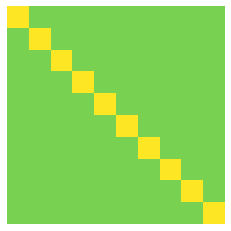

In [2]:
d = 10
A = single_corr_matrix(d, 0.0)
B = single_corr_matrix(d, 0.9)

fig = plt.figure()

frames = 30
filename = 'frechet_geodesic.gif'
interval = 50
colormap = 'viridis'

Kbar = A
im = plt.imshow(A, interpolation='none', animated=True)

def init():
    Kbar = frechet_barycenter_corr([A, 0*B], force_corr=True, ord='wasserstein', verbose=False)
    im.set_data(Kbar)
    return [im]

def animate(i):
    w = i/frames
    Kbar = frechet_barycenter_corr([(1-w)*A, w*B], force_corr=True, ord='wasserstein', verbose=False)
    im.set_array(getattr(cm, colormap)(Kbar))
    return [im]

plt.axis('off')
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames,
                                interval=interval, blit=True, repeat=True)

anim.save(filename, writer='imagemagick')